# **Sentimen Analisis Review APK Play Store Pluang**

Analisis sentimen merupakan salah satu aspek penting dalam pemrosesan bahasa alami yang memungkinkan pengidentifikasian otomatis terhadap kecenderungan ulasan pengguna, apakah bersifat positif, negatif, atau netral. Proyek ini bertujuan membantu memahami umpan balik pengguna secara lebih mendalam dan mendukung pengambilan keputusan yang lebih baik dalam pengembangan serta peningkatan aplikasi.


# **Import Library**

In [54]:
!pip install google-play-scraper

In [55]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

Perintah di atas akan mengunduh dan menginstal pustaka google_play_scraper beserta dependensinya jika diperlukan. Setelah proses instalasi selesai, pustaka tersebut dapat diimpor dan digunakan dalam notebook untuk mengambil data dari Play Store serta melanjutkan analisis sentimen.

In [56]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [57]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scapping Dataset

Scraping data adalah proses pengambilan data secara otomatis dari sebuah situs web, aplikasi, atau media sosial. Teknik ini memungkinkan pengguna untuk mengumpulkan informasi yang ditampilkan pada paltform, seperti teks, gambar, atau elemen-elemen lainnya, untuk kemudian diolah atau dianalisis lebih lanjut.

In [58]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.EmasDigi' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.EmasDigi',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=10000             # Jumlah maksimum ulasan yang ingin diambil
)

In [59]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi_pluang.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [60]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi_pluang.csv', index=False)

In [61]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [62]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c02e9c9c-e7f4-4d83-a307-7767cb874ad2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"UI nya mudah dipahami bagi saya yang pemula,tapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollar/idr. Karena kalo global patokannya dollar,semoga update kedepannya fitur tsb sudah terealisasi.",5,79,6.0.4,2024-12-25 03:00:44,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. -V\n",2024-12-25 05:12:23,6.0.4
1,056e0bc7-45bb-4e84-90dd-ce10b85b0420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi sudah bagus, tapi tolong autoinvest kalo udah dibatalkan, agar bisa dihapus. Jadinya numpuk autoinvest saya yang saya batalkan. Kalo bisa lebih bagus lagi, autoinvest bisa diedit ga cuma nominal, tapi frekuensi, pilihan saham dan lainnya.",5,3,6.0.4,2025-01-21 00:54:35,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. 🤩🚀 -FE\n",2025-01-21 05:06:45,6.0.4
2,c4cb775a-d2e2-44b1-9148-ceac55e2c810,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sudah 1 tahun saya menggunakan Pluang, dan sejauh ini sih pengalaman saya sangat memuaskan. Mulai dari fitur investasi emas, saham, hingga kripto, semuanya tersedia dalam satu aplikasi yang mudah digunakan. Selain itu, edukasi yang diberikan juga sangat membantu, terutama bagi pemula. Kalau ingin investasi dengan cara simpel dan aman, saya sangat merekomendasikan untuk buka Pluang sekarang! Twitter: @putraversea",5,12,6.0.4,2025-01-13 01:19:38,"Hai Sobat Cuan, terima kasih atas kepercayaan kamu dengan Pluang. Kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Yuk segera ajak teman kamu untuk mencoba aplikasi dan berbagai fitur menarik di Pluang. Kamu juga bisa membagikan kode referral ke temanmu & menangkan reward menariknya! -FE\n",2025-01-13 05:12:18,6.0.4
3,33e16414-cb61-4120-b53c-6f4a5fe9f150,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"""Buka pluang"" aplikasi investasi adalah solusi terbaik bagi siapa pun yang ingin mengelola keuangan dengan bijak. Desainnya modern, navigasinya mudah, dan fitur-fiturnya sangat membantu, terutama untuk pemula sekalipun. Dukungan edukasi seperti artikel dan analisis pasar membuat pengalaman investasi lebih percaya diri. Tidak hanya aman, aplikasi ini juga memberikan transparansi penuh terhadap portofolio dan keuntungan. Benar-benar partner andalan untuk mencapai tujuan finansial!"" Ig @xevi_n12",5,5,6.0.4,2025-01-10 13:49:56,"Hai Sobat Cuan, terima kasih atas kepercayaan kamu dengan Pluang. Kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Yuk segera ajak teman kamu untuk mencoba aplikasi dan berbagai fitur menarik di Pluang. Kamu juga bisa membagikan kode referral ke temanmu & menangkan reward menariknya! -FE\n",2025-01-11 02:22:58,6.0.4
4,6cde012d-845f-43e3-811b-e2f07168ad58,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Ba

In [63]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26942 entries, 0 to 26941
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              26942 non-null  object        
 1   userName              26942 non-null  object        
 2   userImage             26942 non-null  object        
 3   content               26942 non-null  object        
 4   score                 26942 non-null  int64         
 5   thumbsUpCount         26942 non-null  int64         
 6   reviewCreatedVersion  22182 non-null  object        
 7   at                    26942 non-null  datetime64[ns]
 8   replyContent          26537 non-null  object        
 9   repliedAt             26537 non-null  datetime64[ns]
 10  appVersion            22182 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.3+ MB


In [64]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [65]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21849 entries, 0 to 26927
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21849 non-null  object        
 1   userName              21849 non-null  object        
 2   userImage             21849 non-null  object        
 3   content               21849 non-null  object        
 4   score                 21849 non-null  int64         
 5   thumbsUpCount         21849 non-null  int64         
 6   reviewCreatedVersion  21849 non-null  object        
 7   at                    21849 non-null  datetime64[ns]
 8   replyContent          21849 non-null  object        
 9   repliedAt             21849 non-null  datetime64[ns]
 10  appVersion            21849 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.0+ MB


In [66]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

##Preprocessing

Berikut adalah penjelasan singkat tentang beberapa fungsi yang digunakan untuk membersihkan dan memproses teks:

1. cleaningText(text)
Fungsi ini membersihkan teks melalui beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan, angka, dan tanda baca. Selain itu, fungsi ini menggantikan karakter newline dengan spasi dan menghilangkan spasi berlebih di awal maupun akhir teks.

2. casefoldingText(text)
Fungsi ini mengubah semua karakter dalam teks menjadi huruf kecil (lowercase) agar teks lebih seragam.

3. tokenizingText(text)
Fungsi ini memecah teks menjadi daftar kata atau token, yang berguna untuk memisahkan teks menjadi bagian-bagian dasar.

4. filteringText(text)
Fungsi ini menghapus kata-kata yang termasuk dalam daftar stopwords. Anda juga telah menambahkan beberapa kata tambahan ke daftar stopwords tersebut.

5. stemmingText(text)
Fungsi ini melakukan stemming pada teks, yaitu mengubah kata-kata menjadi bentuk dasarnya. Dalam hal ini, pustaka Sastrawi digunakan untuk stemming teks berbahasa Indonesia.

6. toSentence(list_words)
Fungsi ini menggabungkan daftar kata menjadi sebuah kalimat utuh.

Fungsi-fungsi ini dapat digunakan dalam proyek analisis sentimen untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk menggunakan fungsi-fungsi ini sesuai dengan urutan tahap pemrosesan teks yang dibutuhkan.

In [67]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [68]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "parahhhh": "parah", "parahhhhhh": "parah", "niiii": "ini", "gk": "tidak", "rb": "ribu", "apk": "aplikasi", "g": "tidak", "sdh": "sudah", "nunggu": "tunggu", "hp": "ponsel", "bener": "benar", "sangaatt": "sangat", "bagusss": "bagus", "yanggg": "yang", "perbaik": "baik", "gajelas": "tidak jelas", "cuman": "cuma", "yeey": "iya", "ribetribetin": "rumit", "idr": "rupiah", "fixs": "tetap", "cht": "obrolan", "cuan": "untung", "ok": "oke", "app": "aplikasi", "simple": "mudah", "profit": "untung", "good": "bagus", "sukse": "sukses", "berinvestasi": "investasi", "aplikasinya": "aplikasi", "bagu": "bagus", "udh": "udah", "sipppp": "aman", "baguss": "bagus", "bags": "bagus", "muantap": "mantap", "mengganggu": "ganggu", "suksesss": "sukses", "haii": "hai", "rekomended": "rekomendasi", "mantaaaap": "mantap", "mengubah": "ubah"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang bahasa Indonesia beserta terjemahannya ke dalam bahasa formal berfungsi sebagai alat untuk memahami dan menggunakan kata-kata slang. Berikut adalah beberapa manfaatnya:

1. **Memahami Kata Slang,**
Kamus slang memudahkan orang yang tidak akrab dengan istilah-istilah slang atau ekspresi tertentu untuk memahami artinya dalam bahasa formal.

2. **Komunikasi Informal,**
Dalam percakapan santai atau di media sosial, slang sering digunakan. Kamus slang membantu individu berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteks.

3. **Memahami Budaya Populer,**
Slang sering mencerminkan tren dalam budaya populer. Kamus ini memungkinkan orang mengikuti perkembangan bahasa dalam konteks budaya tersebut.

4. **Penggunaan dalam Penulisan atau Sastra,**
Penulis atau pembicara dapat menggunakan slang untuk menciptakan suasana yang realistis, menggambarkan karakter, atau menyesuaikan konteks cerita. Kamus slang membantu dalam memilih istilah yang tepat.

5. **Hiburan dan Rasa Ingin Tahu,**
Bagi sebagian orang, mempelajari slang bisa menjadi hiburan atau cara untuk mengeksplorasi variasi bahasa dan ungkapan sehari-hari.

Penting untuk diingat bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang lebih cocok untuk situasi informal, seperti percakapan dengan teman, sementara bahasa formal lebih sesuai untuk situasi resmi atau profesional.

In [69]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c02e9c9c-e7f4-4d83-a307-7767cb874ad2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"UI nya mudah dipahami bagi saya yang pemula,tapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollar/idr. Karena kalo global patokannya dollar,semoga update kedepannya fitur tsb sudah terealisasi.",5,79,6.0.4,2024-12-25 03:00:44,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. -V\n",2024-12-25 05:12:23,6.0.4
1,056e0bc7-45bb-4e84-90dd-ce10b85b0420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi sudah bagus, tapi tolong autoinvest kalo udah dibatalkan, agar bisa dihapus. Jadinya numpuk autoinvest saya yang saya batalkan. Kalo bisa lebih bagus lagi, autoinvest bisa diedit ga cuma nominal, tapi frekuensi, pilihan saham dan lainnya.",5,3,6.0.4,2025-01-21 00:54:35,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. 🤩🚀 -FE\n",2025-01-21 05:06:45,6.0.4
2,c4cb775a-d2e2-44b1-9148-ceac55e2c810,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sudah 1 tahun saya menggunakan Pluang, dan sejauh ini sih pengalaman saya sangat memuaskan. Mulai dari fitur investasi emas, saham, hingga kripto, semuanya tersedia dalam satu aplikasi yang mudah digunakan. Selain itu, edukasi yang diberikan juga sangat membantu, terutama bagi pemula. Kalau ingin investasi dengan cara simpel dan aman, saya sangat merekomendasikan untuk buka Pluang sekarang! Twitter: @putraversea",5,12,6.0.4,2025-01-13 01:19:38,"Hai Sobat Cuan, terima kasih atas kepercayaan kamu dengan Pluang. Kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Yuk segera ajak teman kamu untuk mencoba aplikasi dan berbagai fitur menarik di Pluang. Kamu juga bisa membagikan kode referral ke temanmu & menangkan reward menariknya! -FE\n",2025-01-13 05:12:18,6.0.4
3,33e16414-cb61-4120-b53c-6f4a5fe9f150,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"""Buka pluang"" aplikasi investasi adalah solusi terbaik bagi siapa pun yang ingin mengelola keuangan dengan bijak. Desainnya modern, navigasinya mudah, dan fitur-fiturnya sangat membantu, terutama untuk pemula sekalipun. Dukungan edukasi seperti artikel dan analisis pasar membuat pengalaman investasi lebih percaya diri. Tidak hanya aman, aplikasi ini juga memberikan transparansi penuh terhadap portofolio dan keuntungan. Benar-benar partner andalan untuk mencapai tujuan finansial!"" Ig @xevi_n12",5,5,6.0.4,2025-01-10 13:49:56,"Hai Sobat Cuan, terima kasih atas kepercayaan kamu dengan Pluang. Kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Yuk segera ajak teman kamu untuk mencoba aplikasi dan berbagai fitur menarik di Pluang. Kamu juga bisa membagikan kode referral ke temanmu & menangkan reward menariknya! -FE\n",2025-01-11 02:22:58,6.0.4
4,6cde012d-845f-43e3-811b-e2f07168ad58,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Ba

In [70]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [71]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [72]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,c02e9c9c-e7f4-4d83-a307-7767cb874ad2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"UI nya mudah dipahami bagi saya yang pemula,tapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollar/idr. Karena kalo global patokannya dollar,semoga update kedepannya fitur tsb sudah terealisasi.",5,79,6.0.4,2024-12-25 03:00:44,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. -V\n",2024-12-25 05:12:23,6.0.4,UI nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr Karena kalo global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,ui nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr karena kalo global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,ui nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr karena kalau global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,"[ui, nya, mudah, dipahami, bagi, saya, yang, pemulatapi, tolong, tambahkan, fitur, untuk, melihat, harga, aset, dengan, versi, dollaridr, karena, kalau, global, patokannya, dollarsemoga, update, kedepannya, fitur, tsb, sudah, terealisasi]","[ui, mudah, dipahami, pemulatapi, tolong, tambahkan, fitur, harga, aset, versi, dollaridr, global, patokannya, dollarsemoga, update, kedepannya, fitur, tsb, terealisasi]",ui mudah dipahami pemulatapi tolong tambahkan fitur harga aset versi dollaridr global patokannya dollarsemoga update kedepannya fitur tsb terealisasi
1,056e0bc7-45bb-4e84-90dd-ce10b85b0420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi sudah bagus, tapi tolong autoinvest kalo udah dibatalkan, agar bisa dihapus. Jadinya numpuk autoinvest saya yang saya batalkan. Kalo bisa lebih bagus lagi, autoinvest bisa diedit ga cuma nominal, tapi frekuensi, pilihan saham dan lainnya.",5,3,6.0.4,2025-01-21 00:54:35,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. 🤩🚀 -FE\n",2025-01-21 05:06:45,6.0.4,Aplikasi sudah bagus tapi tolong autoinvest kalo udah dibatalkan agar bisa dihapus Jadinya numpuk autoinvest saya yang saya batalkan Kalo bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,aplikasi sudah bagus tapi tolong autoinvest kalo udah dibatalkan agar bisa dihapus jadinya numpuk autoinvest saya yang saya batalkan kalo bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,aplikasi sudah bagus tapi tolong autoinvest kalau sudah dibatalkan agar bisa dihapus jadinya bertumpuk autoinvest saya yang saya batalkan kalau bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,"[aplikasi, sudah, bagus, tapi, tolong, autoinvest, kalau, sudah, dibatalkan, agar, bisa, dihapus, jadinya, bertumpuk, autoinvest, saya, yang, saya, batalkan, kalau, bisa, lebih, bagus, lagi, autoinvest, bisa, diedit, ga, cuma, nominal, tapi, frekuensi, pilihan, sah

##Pelabelan

Pelabelan dilakukan dengan tiga kelas, yaitu positif, negatif dan netral

In [73]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [74]:
# Function to determine sentiment polarity of reviews
# Fungsi untuk menentukan polaritas sentimen dari review

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [75]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    10020
negative     7232
neutral      4597
Name: count, dtype: int64


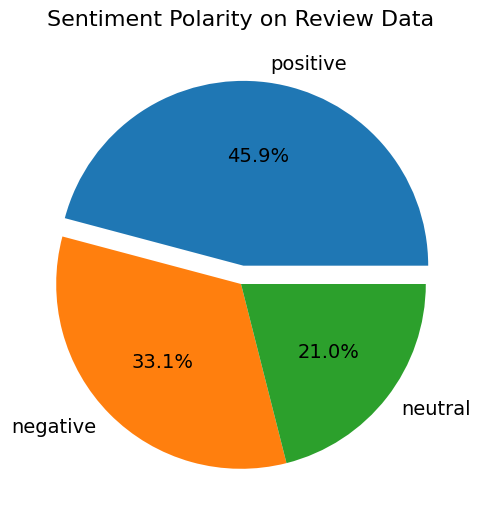

In [76]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [77]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_reviews' yang hanya berisi review dengan polaritas positif.
positive_reviews = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_reviews'.
positive_reviews = positive_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_reviews' berdasarkan 'polarity_score' secara menurun.
positive_reviews = positive_reviews.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_reviews = positive_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_reviews.index += 1

In [78]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_reviews' yang hanya berisi review dengan polaritas negatif.
negative_reviews = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_reviews'.
negative_reviews = negative_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_reviews' berdasarkan 'polarity_score' secara menaik (ascending).
negative_reviews = negative_reviews.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_reviews = negative_reviews[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_reviews = negative_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_reviews.index += 1

In [79]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_reviews' yang hanya berisi review dengan polaritas negatif.
neutral_reviews = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_reviews'.
neutral_reviews = neutral_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_reviews' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_reviews = neutral_reviews.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_reviews = neutral_reviews[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_reviews = neutral_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_reviews.index += 1

## **Wordcloud untuk semua reviews**

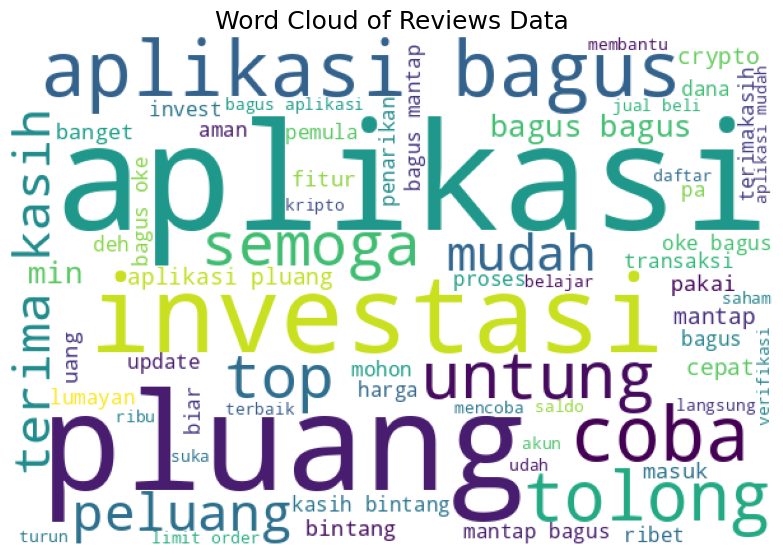

In [80]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for review in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Reviews Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Wordcloud untuk positive reviews**

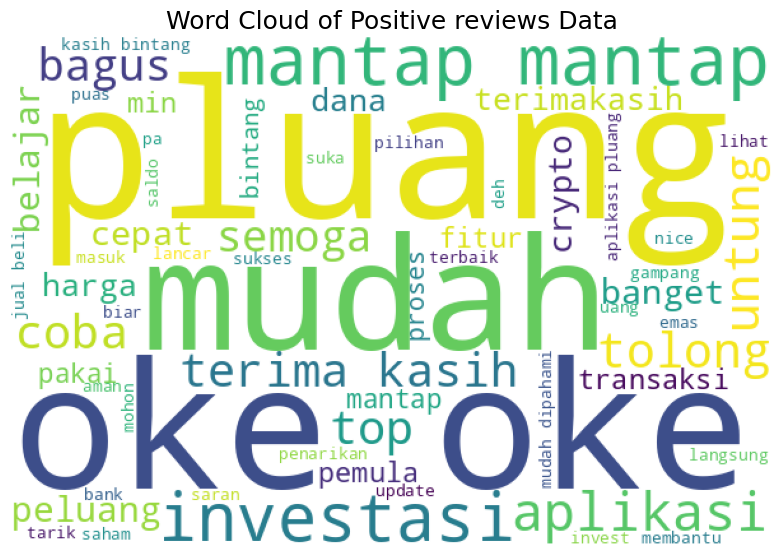

In [81]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review positif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'positive_reviews'.
for review in positive_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive reviews Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Wordcloud untuk negative reviews**

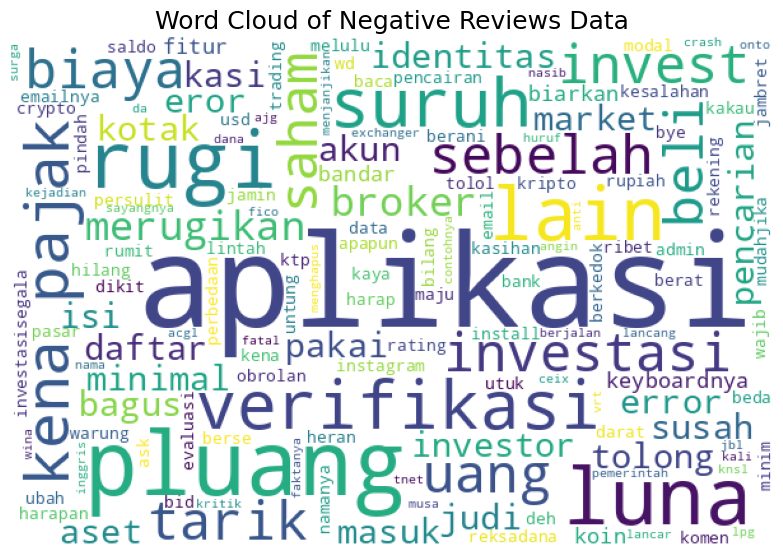

In [82]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review negatif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'negative_reviews'.
for review in negative_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Reviews Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Wordcloud untuk neutral reviews**

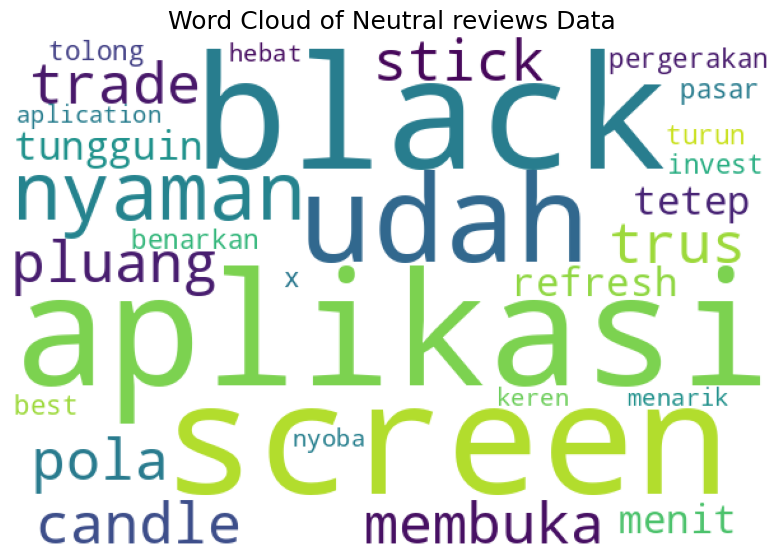

In [83]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review positif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'neutral_reviews'.
for review in neutral_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral reviews Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Class ditribution**

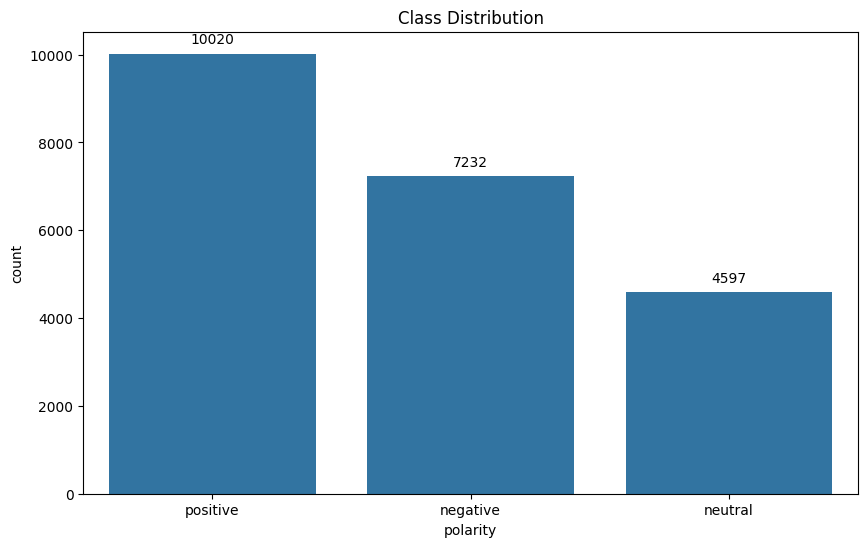

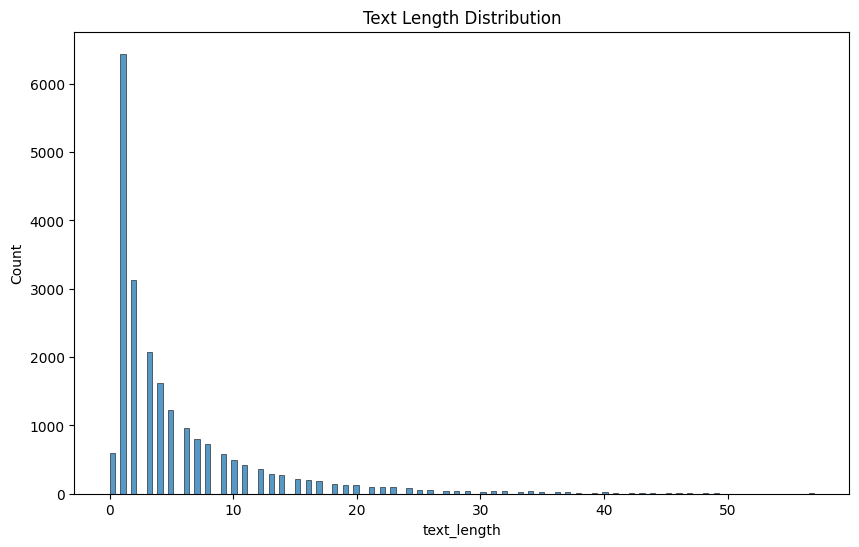

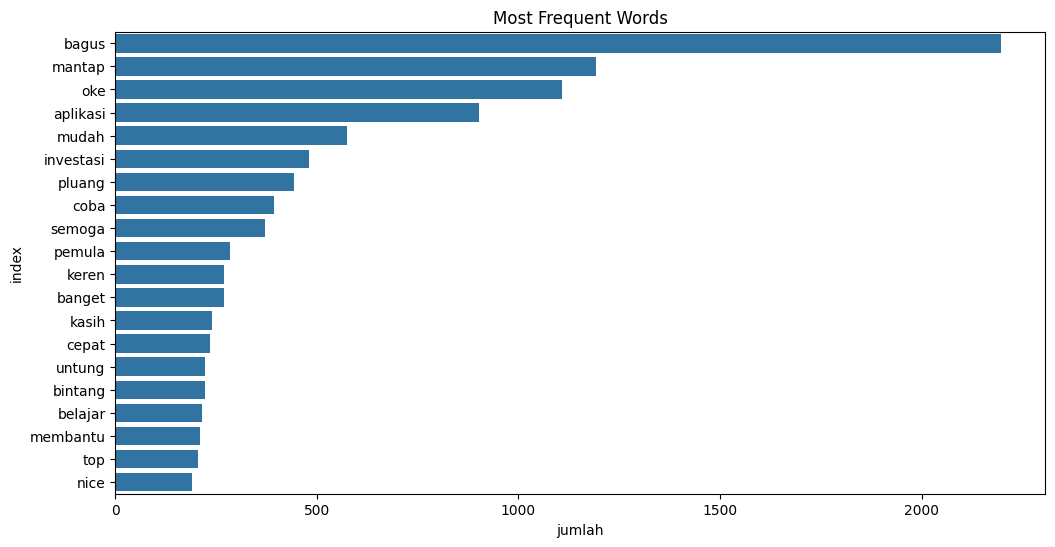

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

## **Data Splitting 70/30 dan Ekstraksi Fitur TF-IDF**

In [86]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,c02e9c9c-e7f4-4d83-a307-7767cb874ad2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"UI nya mudah dipahami bagi saya yang pemula,tapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollar/idr. Karena kalo global patokannya dollar,semoga update kedepannya fitur tsb sudah terealisasi.",5,79,6.0.4,2024-12-25 03:00:44,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. -V\n",2024-12-25 05:12:23,6.0.4,UI nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr Karena kalo global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,ui nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr karena kalo global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,ui nya mudah dipahami bagi saya yang pemulatapi tolong tambahkan fitur untuk melihat harga aset dengan versi dollaridr karena kalau global patokannya dollarsemoga update kedepannya fitur tsb sudah terealisasi,"[ui, nya, mudah, dipahami, bagi, saya, yang, pemulatapi, tolong, tambahkan, fitur, untuk, melihat, harga, aset, dengan, versi, dollaridr, karena, kalau, global, patokannya, dollarsemoga, update, kedepannya, fitur, tsb, sudah, terealisasi]","[ui, mudah, dipahami, pemulatapi, tolong, tambahkan, fitur, harga, aset, versi, dollaridr, global, patokannya, dollarsemoga, update, kedepannya, fitur, tsb, terealisasi]",ui mudah dipahami pemulatapi tolong tambahkan fitur harga aset versi dollaridr global patokannya dollarsemoga update kedepannya fitur tsb terealisasi,7,positive,19
1,056e0bc7-45bb-4e84-90dd-ce10b85b0420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi sudah bagus, tapi tolong autoinvest kalo udah dibatalkan, agar bisa dihapus. Jadinya numpuk autoinvest saya yang saya batalkan. Kalo bisa lebih bagus lagi, autoinvest bisa diedit ga cuma nominal, tapi frekuensi, pilihan saham dan lainnya.",5,3,6.0.4,2025-01-21 00:54:35,"Hai Sobat Cuan, terima kasih atas apresiasi yang kamu berikan kepada Pluang ya, kami terus berupaya menyediakan aplikasi yang lebih baik dalam sisi pelayanan, kenyamanan, maupun keuntungan. Tanggapan dari kamu tersebut akan kami jadikan masukan & sampaikan kepada tim terkait untuk meningkatkan kualitas Aplikasi Pluang kedepannya. 🤩🚀 -FE\n",2025-01-21 05:06:45,6.0.4,Aplikasi sudah bagus tapi tolong autoinvest kalo udah dibatalkan agar bisa dihapus Jadinya numpuk autoinvest saya yang saya batalkan Kalo bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,aplikasi sudah bagus tapi tolong autoinvest kalo udah dibatalkan agar bisa dihapus jadinya numpuk autoinvest saya yang saya batalkan kalo bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,aplikasi sudah bagus tapi tolong autoinvest kalau sudah dibatalkan agar bisa dihapus jadinya bertumpuk autoinvest saya yang saya batalkan kalau bisa lebih bagus lagi autoinvest bisa diedit ga cuma nominal tapi frekuensi pilihan saham dan lainnya,"[aplikasi, sudah, bagus, tapi, tolong, autoinvest, kalau, sudah, dibatalkan, agar, bisa, dihapus, jadinya, bertumpuk, autoinvest, saya, yang, saya, batalkan, kalau, bisa, lebih, bagus, lagi, autoinvest, bisa, diedit

In [87]:
# Pisahkan data menjadi fitur (review) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [88]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

In [89]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aa,aaah,aaahhh,aama,aamiin,aamiinn,aamiinnn,aamin,aaminn,aap,...,𝚌𝚛𝚢𝚙𝚝𝚘𝚎𝚖𝚊𝚜,𝚍𝚊𝚗,𝚍𝚊𝚛𝚒,𝚒𝚗𝚟𝚎𝚜𝚝𝚊𝚜𝚒,𝚖𝚊𝚌𝚊𝚖,𝚙𝚊𝚛𝚊,𝚙𝚎𝚖𝚞𝚕𝚊,𝚜𝚊𝚑𝚊𝚖,𝚝𝚎𝚛𝚙𝚎𝚛𝚌𝚊𝚢𝚊𝚊𝚍𝚊,𝚢𝚊𝚗𝚐
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Bagi data menjadi data latih dan data uji sebesar 70/30
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

## **Pemodelan Algoritma Machine Learning dengan data yang di ekstraksi fitur dengan TF-IDF**

## **Naive Bayes**

In [91]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8323525565581273
Naive Bayes - accuracy_test: 0.7487414187643021


## **Random Forest**

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8880244088482074


## **Logistic Regression**

In [93]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.954099646920361
Logistic Regression - accuracy_test: 0.9058733790999237


## **Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.850648360030511


In [95]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.748741
1        Random Forest       0.888024
2  Logistic Regression       0.905873
3        Decision Tree       0.850648


In [96]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                 Model  Accuracy Test
2  Logistic Regression       0.905873
1        Random Forest       0.888024
3        Decision Tree       0.850648
0          Naive Bayes       0.748741


Berdasarkan hasil pemodelan algoritma machine learning diatas dengan TF-IDF Feature Extraction dan 70/30 data splitting, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 90,58%, diikuti algoritma Random Forest dengan akurasi sebesar 88.80% dan Decision Tree 85.06%. Oleh karena itu, algoritma Logistic Regression dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

## **Percobaan dengan Ekstraksi fitur Bag of Words (BoW)**

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag of Words vectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_bow = vectorizer.fit_transform(X)

# Now X_bow contains the Bag of Words representation of my text data
# We can use X_bow for further analysis or model training
X_bow

<21849x14817 sparse matrix of type '<class 'numpy.int64'>'
	with 108077 stored elements in Compressed Sparse Row format>

In [98]:
# Convert the Bag of Words representation to a DataFrame
features_bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
features_bow_df

,aa,aaah,aaahhh,aama,aamiin,aamiinn,aamiinnn,aamin,aaminn,aap,...,𝚌𝚛𝚢𝚙𝚝𝚘𝚎𝚖𝚊𝚜,𝚍𝚊𝚗,𝚍𝚊𝚛𝚒,𝚒𝚗𝚟𝚎𝚜𝚝𝚊𝚜𝚒,𝚖𝚊𝚌𝚊𝚖,𝚙𝚊𝚛𝚊,𝚙𝚎𝚖𝚞𝚕𝚊,𝚜𝚊𝚑𝚊𝚖,𝚝𝚎𝚛𝚙𝚎𝚛𝚌𝚊𝚢𝚊𝚊𝚍𝚊,𝚢𝚊𝚗𝚐
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Bagi data teks yang di ekstraksi fitur dengan BoW menjadi data latih dan data uji sebesar 70/30
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.3, random_state=42)

## **Pemodelan Algoritma Machine Learning dengan data yang di ekstraksi fitur dengan BoW**

## **Naive Bayes**

In [100]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_bow = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_bow.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_bow = naive_bayes_bow.predict(X_train_bow.toarray())
y_pred_test_nb_bow = naive_bayes_bow.predict(X_test_bow.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_bow = accuracy_score(y_pred_train_nb_bow, y_train_bow)
accuracy_test_nb_bow = accuracy_score(y_pred_test_nb_bow, y_test_bow)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_bow)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_bow)

Naive Bayes - accuracy_train: 0.8323525565581273
Naive Bayes - accuracy_test: 0.7487414187643021


## **Random Forest**

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_bow = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_bow.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_bow = random_forest_bow.predict(X_train_bow.toarray())
y_pred_test_rf_bow = random_forest_bow.predict(X_test_bow.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf_bow, y_train_bow)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf_bow, y_test_bow)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_bow)
print('Random Forest - accuracy_test:', accuracy_test_rf_bow)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8837528604118993


## **Logistic Regression**

In [102]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_bow = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_bow.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_bow = logistic_regression_bow.predict(X_train_bow.toarray())
y_pred_test_lr_bow = logistic_regression_bow.predict(X_test_bow.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_bow = accuracy_score(y_pred_train_lr_bow, y_train_bow)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_bow = accuracy_score(y_pred_test_lr_bow, y_test_bow)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_bow)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_bow)

Logistic Regression - accuracy_train: 0.9722113247024977
Logistic Regression - accuracy_test: 0.9109077040427155


## **Decision Tree**

In [103]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree_bow = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree_bow.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt_bow = decision_tree_bow.predict(X_train_bow.toarray())
y_pred_test_dt_bow = decision_tree_bow.predict(X_test_bow.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt_bow = accuracy_score(y_pred_train_dt_bow, y_train_bow)
accuracy_test_dt_bow = accuracy_score(y_pred_test_dt_bow, y_test_bow)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt_bow)
print('Decision Tree - accuracy_test:', accuracy_test_dt_bow)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.8627002288329519


In [104]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df_bow = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb_bow, accuracy_train_rf_bow, accuracy_train_lr_bow, accuracy_train_dt_bow],
    'Accuracy Test': [accuracy_test_nb_bow, accuracy_test_rf_bow, accuracy_test_lr_bow, accuracy_test_dt_bow]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only_bow = results_df_bow[['Model', 'Accuracy Test']]
print(accuracy_test_only_bow)

                 Model  Accuracy Test
0          Naive Bayes       0.748741
1        Random Forest       0.883753
2  Logistic Regression       0.910908
3        Decision Tree       0.862700


In [105]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted_bow = accuracy_test_only_bow.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted_bow)


                 Model  Accuracy Test
2  Logistic Regression       0.910908
1        Random Forest       0.883753
3        Decision Tree       0.862700
0          Naive Bayes       0.748741


Berdasarkan hasil pemodelan algoritma machine learning diatas dengan BoW Feature Extraction dan 70/30 data splitting, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 91,09%, diikuti algoritma Random Forest dengan akurasi sebesar 88.37% dan Decision Tree 86.27%. Oleh karena itu, algoritma Logistic Regression dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

## **Percobaan dengan ekstraksi fitur BoW dan pembagian data latih dan uji sebesar 80/20**

In [106]:
# Bagi data teks yang di ekstraksi fitur dengan BoW menjadi data latih dan data uji sebesar 80/20
X_train_bow2, X_test_bow2, y_train_bow2, y_test_bow2 = train_test_split(X_bow, y, test_size=0.2, random_state=42)

## **Naive Bayes**

In [107]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_bow2 = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_bow2.fit(X_train_bow2.toarray(), y_train_bow2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_bow2 = naive_bayes_bow2.predict(X_train_bow2.toarray())
y_pred_test_nb_bow2 = naive_bayes_bow2.predict(X_test_bow2.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_bow2 = accuracy_score(y_pred_train_nb_bow2, y_train_bow2)
accuracy_test_nb_bow2 = accuracy_score(y_pred_test_nb_bow2, y_test_bow2)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_bow2)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_bow2)

Naive Bayes - accuracy_train: 0.8368327707534756
Naive Bayes - accuracy_test: 0.7535469107551488


## **Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_bow2 = RandomForestClassifier(n_estimators=200)

# Melatih model Random Forest pada data pelatihan
random_forest_bow2.fit(X_train_bow2.toarray(), y_train_bow2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_bow2 = random_forest_bow2.predict(X_train_bow2.toarray())
y_pred_test_rf_bow2 = random_forest_bow2.predict(X_test_bow2.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow2 = accuracy_score(y_pred_train_rf_bow2, y_train_bow2)
accuracy_test_rf_bow2 = accuracy_score(y_pred_test_rf_bow2, y_test_bow2)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_bow2)
print('Random Forest - accuracy_test:', accuracy_test_rf_bow2)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8871853546910755


## **Logistic Regression**

In [109]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_bow2 = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_bow2.fit(X_train_bow2.toarray(), y_train_bow2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_bow2 = logistic_regression_bow2.predict(X_train_bow2.toarray())
y_pred_test_lr_bow2 = logistic_regression_bow2.predict(X_test_bow2.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_bow2 = accuracy_score(y_pred_train_lr_bow2, y_train_bow2)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_bow2 = accuracy_score(y_pred_test_lr_bow2, y_test_bow2)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_bow2)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_bow2)

Logistic Regression - accuracy_train: 0.9717947250986898
Logistic Regression - accuracy_test: 0.9105263157894737


## **Decision Tree**

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree_bow2 = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree_bow2.fit(X_train_bow2.toarray(), y_train_bow2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt_bow2 = decision_tree_bow2.predict(X_train_bow2.toarray())
y_pred_test_dt_bow2 = decision_tree_bow2.predict(X_test_bow2.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt_bow2 = accuracy_score(y_pred_train_dt_bow2, y_train_bow2)
accuracy_test_dt_bow2 = accuracy_score(y_pred_test_dt_bow2, y_test_bow2)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt_bow2)
print('Decision Tree - accuracy_test:', accuracy_test_dt_bow2)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.8704805491990847


In [111]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df_bow2 = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb_bow2, accuracy_train_rf_bow2, accuracy_train_lr_bow2, accuracy_train_dt_bow2],
    'Accuracy Test': [accuracy_test_nb_bow2, accuracy_test_rf_bow2, accuracy_test_lr_bow2, accuracy_test_dt_bow2]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only_bow2 = results_df_bow2[['Model', 'Accuracy Test']]
print(accuracy_test_only_bow2)

                 Model  Accuracy Test
0          Naive Bayes       0.753547
1        Random Forest       0.887185
2  Logistic Regression       0.910526
3        Decision Tree       0.870481


In [112]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted_bow2 = accuracy_test_only_bow2.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted_bow2)


                 Model  Accuracy Test
2  Logistic Regression       0.910526
1        Random Forest       0.887185
3        Decision Tree       0.870481
0          Naive Bayes       0.753547


Berdasarkan hasil pemodelan algoritma machine learning diatas dengan BoW Feature Extraction dan 80/20 data splitting, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 91,05%, diikuti algoritma Random Forest dengan akurasi sebesar 88.71% dan Decision Tree 87.04%. Oleh karena itu, algoritma Logistic Regression dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [113]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: mantap
Sentimen kalimat baru adalah POSITIF.


**Membuat file requirements.txt**

In [114]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=642b949fcb7ac809947513348cc7c546c3f7b4b7695038dc7f7dc4d915c171c7
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [115]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/submission_1_BPML" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/submission_1_BP